In [1]:
import pandas as pd

# Load the provided CSV file to examine its structure and content
file_path = 'monthly_returns.csv'
monthly_returns = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
monthly_returns.head()


,Unnamed: 0,Date,Ticker,Adj Close,Monthly Return
0,282,2004-02-01,A,22.403744,0.264583
1,564,2004-03-01,A,21.118082,-0.057386
2,847,2004-04-01,A,19.463329,-0.078357
3,1129,2004-05-01,A,16.768976,-0.138432
4,1412,2004-06-01,A,15.870855,-0.053558


In [2]:
monthly_returns.tail()

,Unnamed: 0,Date,Ticker,Adj Close,Monthly Return
94044,92672,2023-11-01,ZTS,151.440002,-0.123256
94045,93172,2023-12-01,ZTS,179.130005,0.182845
94046,93672,2024-01-01,ZTS,196.570007,0.097359
94047,94172,2024-02-01,ZTS,189.139999,-0.037798
94048,94672,2024-03-01,ZTS,190.820007,0.008882


In [3]:
unique_dates = sorted(monthly_returns['Date'].unique())
top_5_stocks_by_month = {}
initial_investment = 1

for i in range(1, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    previous_month_data = monthly_returns[monthly_returns['Date'] == previous_month]
    top_5_stocks = previous_month_data.nlargest(5, 'Monthly Return')['Ticker'].tolist()
    top_5_stocks_by_month[current_month] = top_5_stocks

portfolio_value = initial_investment
top_5_strategy_cumulative_returns = []

for i in range(2, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    top_5_stocks = top_5_stocks_by_month[previous_month]
    current_month_data = monthly_returns[(monthly_returns['Date'] == current_month) & (monthly_returns['Ticker'].isin(top_5_stocks))]
    average_return = current_month_data['Monthly Return'].mean() if not current_month_data.empty else 0
    portfolio_value *= (1 + average_return)

    top_5_strategy_cumulative_returns.append(portfolio_value)

total_return = (portfolio_value - initial_investment) / initial_investment

top_5_strategy_cumulative_returns = [(value - 1) * 100 for value in top_5_strategy_cumulative_returns]
top_5_strategy_cumulative_returns = [value /100 for value in top_5_strategy_cumulative_returns ]

In [4]:
total_return

6.143631225922632

In [5]:
top_5_stocks_by_month

{'2004-03-01': ['VIAV', 'A', 'GLW', 'KMG', 'MTG'],
 '2004-04-01': ['ATI', 'BIIB', 'PHM', 'FCX', 'TAP'],
 '2004-05-01': ['EP', 'NVDA', 'CMI', 'ROK', 'AAPL'],
 '2004-06-01': ['HES', 'EP', 'MTG', 'EOG', 'F'],
 '2004-07-01': ['DDS', 'WMB', 'KSS', 'NVDA', 'ADI'],
 '2004-08-01': ['ATI', 'ADSK', 'FLR', 'AAPL', 'NUE'],
 '2004-09-01': ['EP', 'GT', 'CMI', 'NUE', 'R'],
 '2004-10-01': ['CCU', 'AAPL', 'AIV', 'RIG', 'GILD'],
 '2004-11-01': ['VLO', 'KBH', 'NTAP', 'NVDA', 'NUE'],
 '2004-12-01': ['AAPL', 'AMD', 'PH', 'CIEN', 'TER'],
 '2005-01-01': ['KMG', 'X', 'HUM', 'NVDA', 'ATI'],
 '2005-02-01': ['CIEN', 'EA', 'NVDA', 'PEG', 'GT'],
 '2005-03-01': ['VLO', 'WEN', 'AAPL', 'HUM', 'ROK'],
 '2005-04-01': ['EP', 'NVDA', 'MRO', 'VLO', 'FLR'],
 '2005-05-01': ['EOG', 'VLO', 'DDS', 'TAP', 'RIG'],
 '2005-06-01': ['CIEN', 'GLW', 'LLY', 'EFX', 'EP'],
 '2005-07-01': ['SANM', 'NVDA', 'BIG', 'EBAY', 'EP'],
 '2005-08-01': ['BBY', 'HES', 'HRB', 'PAYX', 'VLO'],
 '2005-09-01': ['EP', 'AMGN', 'RHI', 'EBAY', 'ATI'],
 '2005

In [6]:
top_5_stragegy_cumulative_returns = pd.Series(top_5_strategy_cumulative_returns)
top_5_stragegy_cumulative_returns

0     -0.059638
1     -0.146447
2     -0.133896
3     -0.092737
4     -0.128517
         ...   
235    5.948991
236    6.437499
237    6.650886
238    6.264528
239    6.143631
Length: 240, dtype: float64

In [7]:
sp500_file_path = 'SPX.csv'
sp500_data = pd.read_csv(sp500_file_path)

sp500_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,1131.130005,32820000000
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000
...,...,...,...,...,...,...,...
238,2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000
239,2023-12-01,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000
240,2024-01-01,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000
241,2024-02-01,4861.109863,5111.060059,4853.520020,5096.270020,5096.270020,82066930000


In [8]:
sp500_data=sp500_data.drop(sp500_data.index[0])

In [57]:
sp500_data

,Date,Open,High,Low,Close,Adj Close,Volume
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000
5,2004-06-01,1120.680054,1146.339966,1113.319946,1140.839966,1140.839966,27529500000
...,...,...,...,...,...,...,...
238,2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000
239,2023-12-01,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000
240,2024-01-01,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000
241,2024-02-01,4861.109863,5111.060059,4853.520020,5096.270020,5096.270020,82066930000


In [58]:
sp500_data['Monthly Return'] = sp500_data['Adj Close'].pct_change()

In [59]:
sp500_data['Monthly Return']

1           NaN
2     -0.016359
3     -0.016791
4      0.012083
5      0.017989
         ...   
238    0.089179
239    0.044229
240    0.015896
241    0.051721
242    0.005380
Name: Monthly Return, Length: 242, dtype: float64

In [60]:
# Initialize variables
initial_value = 1
cumulative_returns = []

# Calculate the cumulative return for each month
for index, row in sp500_data.iterrows():
    monthly_return = row['Monthly Return']
    if pd.notnull(monthly_return):  # Check if monthly return is not NaN
        initial_value *= (1 + monthly_return)
    cumulative_returns.append(initial_value - 1)  # Subtract 1 to get the cumulative return

    
    
cumulative_returns = cumulative_returns[1:]
cumulative_returns = cumulative_returns[:]
# Create a pandas Series for cumulative returns
Sp500_cumulative_returns_series = pd.Series(cumulative_returns)

Sp500_cumulative_returns_series

0     -0.016359
1     -0.032875
2     -0.021189
3     -0.003581
4     -0.037749
         ...   
236    2.989554
237    3.166009
238    3.232231
239    3.451124
240    3.475073
Length: 241, dtype: float64

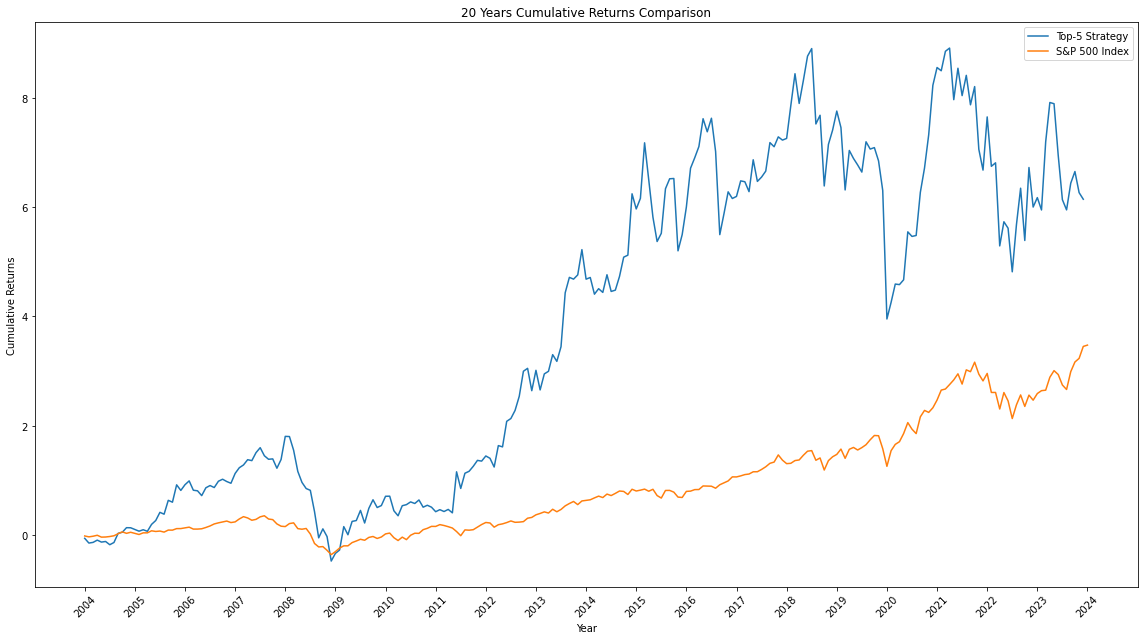

In [62]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,9))

plt.plot(top_5_stragegy_cumulative_returns, label='Top-5 Strategy')

# Plot S&P 500's cumulative returns
plt.plot(Sp500_cumulative_returns_series, label='S&P 500 Index')

plt.title('20 Years Cumulative Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.xticks(ticks=range(0, 241, 12), labels=[str(2004 + i // 12) for i in range(0, 241, 12)], rotation=45)
plt.tight_layout()
plt.show()

In [63]:
def calculate_cumulative_return(monthly_returns, initial_investment=1, top_x=5):
    unique_dates = sorted(monthly_returns['Date'].unique())
    top_stocks_by_month = {}

    for i in range(1, len(unique_dates)):
        previous_month = unique_dates[i-1]
        current_month = unique_dates[i]

        previous_month_data = monthly_returns[monthly_returns['Date'] == previous_month]

        top_stocks = previous_month_data.nlargest(top_x, 'Monthly Return')['Ticker'].tolist()

        top_stocks_by_month[current_month] = top_stocks

    portfolio_value = initial_investment
    cumulative_returns = []

    for i in range(2, len(unique_dates)):
        previous_month = unique_dates[i-1]
        current_month = unique_dates[i]

        top_stocks = top_stocks_by_month[previous_month]

        current_month_data = monthly_returns[(monthly_returns['Date'] == current_month) & (monthly_returns['Ticker'].isin(top_stocks))]

        average_return = current_month_data['Monthly Return'].mean() if not current_month_data.empty else 0

        portfolio_value *= (1 + average_return)

        cumulative_returns.append(portfolio_value)

    total_return_percentage = (portfolio_value - initial_investment) / initial_investment
    cumulative_returns_percentage = [(value - 1) * 100 for value in cumulative_returns]

    return cumulative_returns_percentage, total_return_percentage


In [64]:
#verify the function
top_5_strategy_cumulative_returns, total_return_percentage = calculate_cumulative_return(monthly_returns, top_x=5)

print("Total return percentage using top-5:", total_return_percentage)


Total return percentage using top-5: 6.143631225922632


In [65]:
def find_best_strategy(monthly_returns, max_top_x=20):
    best_strategy = None
    best_return = float('-inf')

    for top_x in range(1, max_top_x + 1):
        _, total_return_percentage = calculate_cumulative_return(monthly_returns, top_x=top_x)
        if total_return_percentage > best_return:
            best_return = total_return_percentage
            best_strategy = top_x

    return best_strategy, best_return

best_strategy, best_return = find_best_strategy(monthly_returns)
print("Best strategy:", best_strategy)
print("Best return:", best_return)

Best strategy: 6
Best return: 6.661275872184503


In [66]:
def calculate_returns_for_all_strategies(monthly_returns, max_top_x=20):
    returns_list = []

    for top_x in range(1, max_top_x + 1):
        _, total_return_percentage = calculate_cumulative_return(monthly_returns, top_x=top_x)
        returns_list.append((top_x, total_return_percentage))

    return returns_list

all_returns = calculate_returns_for_all_strategies(monthly_returns)
for top_x, total_return_percentage in all_returns:
    print(f"Strategy {top_x}: Return: {total_return_percentage}")

Strategy 1: Return: -0.8727826766874123
Strategy 2: Return: -0.2541093780834768
Strategy 3: Return: 0.13732362952997046
Strategy 4: Return: 1.7195358901579825
Strategy 5: Return: 6.143631225922632
Strategy 6: Return: 6.661275872184503
Strategy 7: Return: 4.134480633395882
Strategy 8: Return: 3.5302090545179725
Strategy 9: Return: 4.093954341334618
Strategy 10: Return: 4.403437940311947
Strategy 11: Return: 5.185861845938747
Strategy 12: Return: 6.033950628656215
Strategy 13: Return: 6.158634956894729
Strategy 14: Return: 5.984825451031854
Strategy 15: Return: 5.07918783903478
Strategy 16: Return: 4.691179447474419
Strategy 17: Return: 4.538118946481497
Strategy 18: Return: 4.547898812581696
Strategy 19: Return: 4.5704556610764
Strategy 20: Return: 4.241228896030918


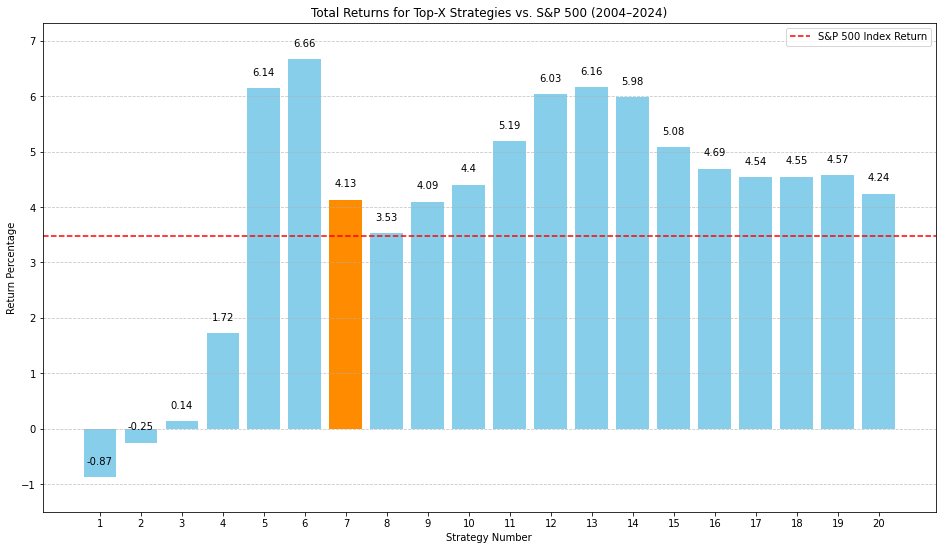

In [67]:
# Calculate all strategy returns and get the index of the highest return
all_strategy_returns = calculate_returns_for_all_strategies(monthly_returns, max_top_x=20)
highest_return_index = all_strategy_returns.index(max(all_strategy_returns, key=lambda x: x[1])) + 1

# Define strategies as a list of strategy numbers
strategies = list(range(1, len(all_strategy_returns) + 1))

# Extract the returns from the all_strategy_returns for plotting
returns = [strategy_return[1] for strategy_return in all_strategy_returns]

# Now define the colors for the bar chart, highlighting the best strategy
bar_colors = ['skyblue' if i != highest_return_index else 'darkorange' for i, _ in enumerate(all_strategy_returns)]

# Now we can plot with the defined strategies and returns
plt.figure(figsize=(16, 9))
plt.bar(strategies, returns, color=bar_colors)
plt.xlabel('Strategy Number')
plt.ylabel('Return Percentage')
plt.title('Total Returns for Top-X Strategies vs. S&P 500 (2004–2024)')
plt.axhline(y=3.475073, color='r', linestyle='--', label='S&P 500 Index Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Plotting the bar values on top of the bars
bars = plt.bar(strategies, returns, color=bar_colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

plt.ylim(-1.5, max(returns) * 1.1)
plt.xticks(strategies) # Ensure all strategy numbers are labeled
plt.show()


In [68]:
Treasury_rate = pd.read_csv('^TYX.csv') #30 year treasury bond

In [69]:
Treasury_rate

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-03-01,4.848,4.951,4.620,4.777,4.777,0
1,2004-04-01,4.779,5.338,4.777,5.282,5.282,0
2,2004-05-01,5.306,5.597,5.250,5.348,5.348,0
3,2004-06-01,5.371,5.536,5.287,5.313,5.313,0
4,2004-07-01,5.306,5.352,5.108,5.205,5.205,0
...,...,...,...,...,...,...,...
235,2023-10-01,4.750,5.152,4.685,5.022,5.022,0
236,2023-11-01,5.060,5.078,4.440,4.513,4.513,0
237,2023-12-01,4.492,4.519,3.943,4.019,4.019,0
238,2024-01-01,4.116,4.425,4.047,4.215,4.215,0


In [70]:
Risk_free_rate = Treasury_rate['Adj Close']

In [71]:
Risk_free_rate

0      4.777
1      5.282
2      5.348
3      5.313
4      5.205
       ...  
235    5.022
236    4.513
237    4.019
238    4.215
239    4.375
Name: Adj Close, Length: 240, dtype: float64

In [72]:
Top_5_monthly_return = monthly_returns['Monthly Return']

In [73]:
Top_5_monthly_return

0        0.264583
1       -0.057386
2       -0.078357
3       -0.138432
4       -0.053558
           ...   
94044   -0.123256
94045    0.182845
94046    0.097359
94047   -0.037798
94048    0.008882
Name: Monthly Return, Length: 94049, dtype: float64

In [74]:
unique_dates = sorted(monthly_returns['Date'].unique())

top_5_stocks_by_month = {}

# Loop to select top 5 stocks based on previous month's return
for i in range(1, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    previous_month_data = monthly_returns[monthly_returns['Date'] == previous_month]

    top_5_stocks = previous_month_data.nlargest(5, 'Monthly Return')['Ticker'].tolist()

    top_5_stocks_by_month[current_month] = top_5_stocks

# Initialize a list to store average returns for each month
top_5_strategy_average_returns = []

# Loop to calculate the average return for the top 5 stocks each month
for i in range(2, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    top_5_stocks = top_5_stocks_by_month[previous_month]

    current_month_data = monthly_returns[(monthly_returns['Date'] == current_month) & (monthly_returns['Ticker'].isin(top_5_stocks))]

    average_return = current_month_data['Monthly Return'].mean() if not current_month_data.empty else 0

    # Store the average return directly without cumulative calculation
    top_5_strategy_average_returns.append(average_return)

# If you need to convert the average returns to percentage format
top_5_strategy_average_returns_percentage = [value * 100 for value in top_5_strategy_average_returns]

# top_5_strategy_average_returns_percentage now holds the average monthly returns in percentage format


In [75]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rates):

    excess_returns = np.array(returns) - np.array(risk_free_rates)
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)

    sharpe_ratio = mean_excess_return / std_excess_return

    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(top_5_strategy_average_returns_percentage, Risk_free_rate)
print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: -0.19625590996497674


In [76]:
Sp500_cumulative_returns_series = Sp500_cumulative_returns_series [:-1]

In [77]:
sp500_sharpe_ratio = calculate_sharpe_ratio(Sp500_cumulative_returns_series, Risk_free_rate)
print("sp500_sharpe_ratio:", sp500_sharpe_ratio)

sp500_sharpe_ratio: -1.5044629762351607


# Incorporate transaction costs 

In [18]:
unique_dates = sorted(monthly_returns['Date'].unique())
top_5_stocks_by_month = {}
initial_investment = 1
transaction_cost_rate = 0.0005  # 0.05%
portfolio_value = initial_investment

# Initialize the dictionary with empty list for the first month
top_5_stocks_by_month[unique_dates[0]] = []

top_5_strategy_cumulative_returns = []

for i in range(1, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    previous_month_data = monthly_returns[monthly_returns['Date'] == previous_month]
    top_5_stocks = previous_month_data.nlargest(5, 'Monthly Return')['Ticker'].tolist()
    
    # Determine stocks to sell (those that are not in the new top 5)
    for i in range(2, len(unique_dates)):
        stocks_to_sell = [stock for stock in top_5_stocks_by_month[previous_month] if stock not in top_5_stocks]
        # Determine new stocks to buy (those that were not held previously)
        stocks_to_buy = [stock for stock in top_5_stocks if stock not in top_5_stocks_by_month[previous_month]]

        # Apply transaction costs for selling
        transaction_costs_sell = len(stocks_to_sell) * transaction_cost_rate * (portfolio_value / 5)
        # Apply transaction costs for buying
        transaction_costs_buy = len(stocks_to_buy) * transaction_cost_rate * (portfolio_value / 5)

        # Update portfolio value for transaction costs
        portfolio_value -= (transaction_costs_sell + transaction_costs_buy)
    
    top_5_stocks_by_month[current_month] = top_5_stocks
    
    for i in range(2, len(unique_dates)):
        # Calculate the returns for the current month
        current_month_data = monthly_returns[(monthly_returns['Date'] == current_month) & (monthly_returns['Ticker'].isin(top_5_stocks))]
        average_return = current_month_data['Monthly Return'].mean() if not current_month_data.empty else 0
        portfolio_value *= (1 + average_return)

    top_5_strategy_cumulative_returns.append(portfolio_value)

total_return = (portfolio_value - initial_investment) / initial_investment
top_5_strategy_cumulative_returns = [(value - initial_investment) / initial_investment * 100 for value in top_5_strategy_cumulative_returns]

In [19]:
total_return

2.9149479875951423e+62

In [ ]:
unique_dates = sorted(monthly_returns['Date'].unique())
top_5_stocks_by_month = {}
initial_investment = 1

for i in range(1, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    previous_month_data = monthly_returns[monthly_returns['Date'] == previous_month]
    top_5_stocks = previous_month_data.nlargest(5, 'Monthly Return')['Ticker'].tolist()
    top_5_stocks_by_month[current_month] = top_5_stocks

portfolio_value = initial_investment
top_5_strategy_cumulative_returns = []

for i in range(2, len(unique_dates)):
    previous_month = unique_dates[i-1]
    current_month = unique_dates[i]

    top_5_stocks = top_5_stocks_by_month[previous_month]
    current_month_data = monthly_returns[(monthly_returns['Date'] == current_month) & (monthly_returns['Ticker'].isin(top_5_stocks))]
    average_return = current_month_data['Monthly Return'].mean() if not current_month_data.empty else 0
    portfolio_value *= (1 + average_return)

    top_5_strategy_cumulative_returns.append(portfolio_value)

total_return = (portfolio_value - initial_investment) / initial_investment

top_5_strategy_cumulative_returns = [(value - 1) * 100 for value in top_5_strategy_cumulative_returns]
top_5_strategy_cumulative_returns = [value /100 for value in top_5_strategy_cumulative_returns ]